<a href="https://colab.research.google.com/github/Dheerajraghava/Dheerajraghav_Airbnb_Bookings_Analysis_Capstone_Project/blob/main/Sample_EDA_Submission_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual/Team
##### **Team Member 1 -**
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

#### **Define Your Business Objective?**

Answer Here.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Importing all usefull Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Loading

In [ ]:
#Mpunting the google drive for load the data sheet.
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/EMD Project Airbnb NYC 2019 by Dheeraj Raghav/Airbnb NYC 2019.csv')

### Dataset First View

In [ ]:
# Dataset First Look
data

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
#  In this data sheet there are 48896 rows and 16 columns.

### Dataset Information

In [ ]:
# # Dataset Info
data.info()


In [ ]:
data.describe()

#CLEANING OF DATA SHEET ✈



## Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
data.duplicated().value_counts()

#no duplicate value count

In [ ]:
# Checking subset duplicate
data.duplicated(subset=['id']).value_counts()


We need to drop all duplicate rows if its there as it can creat problem in machine learning algorithm and other data science task.⚠️
As no duplicate rows are present in data sheet we dont have to drop any duplicate rows.

## Missing Values/Null Values😶

In [ ]:
#Null Values Count
data.isnull().sum()

In [ ]:
# Visualizing the missing values
data.notnull().sum()

In [ ]:
#We can drop name , host_name and last_review as its seems many null values and not so important.
data1=data.drop(columns=['last_review'],axis=1)
data1

In [ ]:
#replacing NaN values reviews_per_month with '0'.

data1.fillna({'reviews_per_month':0},inplace=True)


In [ ]:
#we can drop all rows with 0 availability_365 or we can sent mail to the client for information.

data1.drop(data1[data1['availability_365']==0].index,inplace=True)

In [ ]:
#ectract all rows whose price is greater than 0.
data1= data1.loc[data1['price']>0]
data1.describe()

#              CLEAN DATA SET

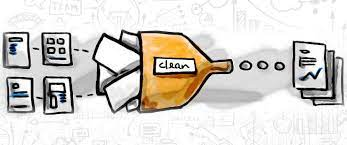

In [ ]:
data1.reset_index().head()

### What did you know about your dataset?

Dataset gives us the complete overview of bussiness model of Airbnb an online market an online marketplace that connects people who want to rent out their property with people who are looking for accommodations in specific locales. Its an Amarican company.

This data sheet porived us the complete information of host who have listed there properties on Airbnb.
It provied us the host name with there ID's ,there property location ,logititude and latitude,property neighbourhood,property information like type of room,its Prices,minimum nights,rooms availability in 365 days,property number of reviews per month.

By studing dataset
1. We found out that there are 48895 rows and 16 coloums total.
2. There are 16 null values in property ['name']coloum,21 null values in ['host_name'] column,10052 null values in  ['last_review'] column,10052 null value in ['reviews_per_month'].
3. There is no missing values in data set.
4. There is no duplicate rows values and coloums

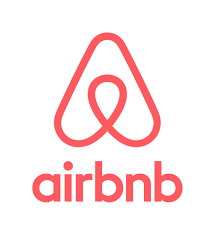

After cleaning of data sheet we came up with 31354 rows and 13 columns.

1. We have droped the 'name,'host_name',and 'last_review' columns as they have many NuN values  with the help of data.drop(columns=[''],axis=1).

2. We have replace all NuN values in of 'reviews_per_month' with 0.with data1.fillna{} function.

3. We have drop all the rows of properties with 0 availability_365 and extract all rows whose price is greater than 0.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
data1.columns

In [ ]:
# Dataset Describe
data1.describe()

### Variables Description

Answer Here

1. id'= Range from 2539-36487245 (Continuous variable).
2. host_id'= Range from 2787-68119814 (Continuous variable).
3. neighbourhood_group= example-Manhattan,Brokley categorical data.
4. neighbourhood= categorical data.
5. longitude = Continuous numarical variable.
6. Room_type = Categorical data.
7. price= Continuous Variable.with minimun 10$ and maximum 1000$
8. minimum_nights= Categorical numaric data.With minimum nights 1 - 1250.
9. number_of_reviews= Continous numarical data.
10. reviews_per_month= Contiouns numarical data.
11. calculated_host_listings_count-contiouns numarical data.
12. availability_365- Categorical.
      

### Check Unique Values for each variable.

In [ ]:
data1.columns

In [ ]:
# Check Unique Values for each variable.
unique_values=data1['id'].unique()
print(f'id Unique values = {unique_values}')

unique_values=data1['host_id'].unique()
print(f'host_id Unique values = {unique_values}')

unique_values=data1['neighbourhood_group'].unique()
print(f'neighbourhood_group Unique values = {unique_values}')

unique_values=data1['room_type'].unique()
print(f'room type Unique values = {unique_values}')

unique_values=data1['calculated_host_listings_count'].unique()
print(f'calculated_host_listings_count Unique values = {unique_values}')


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
data1.columns

In [ ]:
# Write your code to make your dataset analysis ready.

#TOP MOST EXPANSIVE PROPERTY
most_expansive_properties=data1.sort_values('price',ascending= False)[['id','name','host_name','price','minimum_nights','neighbourhood_group','neighbourhood']].reset_index()
most_expansive_properties.head(5)

In [ ]:
##TOP MOST CHEAPEST PROPERTIES
most_chepest_properties=data1.sort_values('price',ascending= True)[['id','name','host_name','price','minimum_nights','neighbourhood_group','neighbourhood']].reset_index()
most_chepest_properties.head(5)

In [ ]:
#All properties with private room type.

private_room_properties=data1[data1['room_type']=='Private room'].reset_index()
private_room_properties

In [ ]:
#Properties with 'Entire home/apt'.
properties_with_entire_home=data1[data1['room_type']=='Entire home/apt'].reset_index()
properties_with_entire_home

In [ ]:
#Properties with 'Shared room'
property_with_sharedroom= data1[data1['room_type']=='Shared room'].value_counts().reset_index()
property_with_sharedroom

In [ ]:
#averange price of all properties listed.

avg_price=data1['price'].mean().round()
print(f'Avrage price of property listed = {avg_price}')

In [ ]:
#Max number of reviews
data1['number_of_reviews'].max()

In [ ]:
#Highest numbers of reviews to which property

data1.sort_values('number_of_reviews',ascending=False).head(1)[['id','host_id','neighbourhood_group',	'neighbourhood','number_of_reviews','reviews_per_month']]

In [ ]:
#lowest numbers of reviews

data1[data1['number_of_reviews']==1].sort_values('number_of_reviews',ascending=True).head(5)[['id','host_id','neighbourhood_group',	'neighbourhood','number_of_reviews','reviews_per_month']]

In [ ]:
#Highest numbers of reviews per month

data1.sort_values('reviews_per_month',ascending=False).head(1)[['id','name','host_name','host_id','neighbourhood_group',	'neighbourhood','number_of_reviews','reviews_per_month','price']]

In [ ]:

# Filter the dataset for properties with a price of 132 $ or more
data1_filter1 = data1[data1['price']>=132]
data1_filter1
# # Filter the dataset for movies with a popularity of 39.0 or higher
data1_filter2 = data1[data1['number_of_reviews']>=39]
data1_filter2

data1_filter_final = pd.concat([data1_filter1, data1_filter2],axis=0)
data1_filter_final
final = data1_filter_final.sort_values('price', ascending=False)[['price','number_of_reviews','id']].reset_index()
final.head(5)

In [ ]:
data1.columns

In [ ]:
#Most expansive property in which naighbourhood.
data1.groupby('neighbourhood_group')['price'].mean().reset_index().sort_values('price',ascending=False)

In [ ]:
#Maximum number of properties in which neighbourhood_group.
data1.groupby('neighbourhood_group',)['name'].count().reset_index().sort_values('name',ascending=False)

In [ ]:
#Host with hight number of properties listed.

data1.groupby('host_name')['id'].count().reset_index().sort_values('id',ascending=False).head(5)

In [ ]:
#Which room type are maximum listed
data.groupby('room_type')['id'].count().reset_index()

### What all manipulations have you done and insights you found?

*Answer* Here.



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
data1.info()

In [ ]:
# # Chart - 1 visualization code
#Average prices of Airbnb listed properties VS Neighbourhood group (Location)
neighbourhood_grp_avg_price=data1.groupby('neighbourhood_group')['price'].mean().reset_index().sort_values('price',ascending=False)
neighbourhood_grp_avg_price

In [ ]:
#Bar chart for Average prices of Airbnb listed properties VS Neighbourhood group (Location)
av=sns.barplot(data=neighbourhood_grp_avg_price,x='neighbourhood_group',y='price')
av.set_ylabel('Average price')
av.set_xlabel('Neighbourhood_group')
av.set_title('Location wise Avg. Price of properties',size=11)

In [ ]:

body_style_means = data1.groupby('neighbourhood_group')['id'].count().reset_index()
body_style_means


# Create bar plots of the average dimensions for each body style and make
# body_style_means.plot(kind='bar', rot=0)

In [ ]:

body_style_means = data1.groupby('neighbourhood_group').sum().reset_index()
body_style_means


# Create bar plots of the average dimensions for each body style and make
# body_style_means.plot(kind='bar', rot=0)

In [ ]:
id

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

In [ ]:
# Chart - 2 visualization code

#Analise Room type at Airbnb VS Average Prices
room_type_price=data1.groupby('room_type')['price'].mean().reset_index()
room_type_price

In [ ]:
sns.barplot(data=room_type_price,x='room_type',y='price')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [ ]:
# Chart - 3 visualization code

#Analise which neighbourhood_group have maximum number of Airbnb


Max_airbnb_in_neighbourhood=data1['neighbourhood_group'].value_counts().reset_index()
Max_airbnb_in_neighbourhood.rename(columns={'neighbourhood_group':'Total_count','index':'neighbourhood_group'},inplace=True)
Max_airbnb_in_neighbourhood

In [ ]:
#Analising  neighbourhood_group have maximum number of Airbnb in Pie chart.

data1['neighbourhood_group'].value_counts().plot.pie(explode=[0.05,0.05,0.05,0.05,0.05],autopct='%1.0f%%',figsize=(10,5))
plt.title("Pie chart of Species")


In [ ]:
#Analising neighbourhood_group have maximum number of Airbnb in bar chart
airbnb_in_neighbourhood=sns.barplot(data=Max_airbnb_in_neighbourhood,x='neighbourhood_group',y='Total_count')
airbnb_in_neighbourhood.set_ylabel('Numbers of Airbnb')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [ ]:
data1.columns

In [ ]:
# Chart - 4 visualization code
ab=data1.groupby(['neighbourhood_group'],as_index=False)['room_type'].value_counts()
sns.barplot(data=ab,x='neighbourhood_group',y='count',hue='room_type')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [ ]:
# Chart - 5 visualization code

sns.scatterplot(data=data1,x='latitude', y='longitude',hue='neighbourhood_group')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [ ]:
# Chart - 6 visualization code
sns.scatterplot(data=data1,x='latitude', y='longitude',hue='availability_365')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [ ]:
# Chart - 7 visualization code

# data1.groupby('neighbourhood_group').plot(kind='box',values='price')
sns.scatterplot(data=data1,x='latitude', y='longitude',hue='minimum_nights',palette='rocket_r')


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

data[['price']].describe()

In [ ]:
def price_catagory(price):
  if price<=80:
    return 'cheep'
  elif price>=80 and price<=500:
    return 'affordable'
  else:
    return 'Expensive'

In [ ]:
plt.figure(figsize=(10,5))
count_price = sns.countplot(x=data['price'].apply(price_catagory))
count_price.set_title('Count Plot')
count_price.set_xlabel('Catogories of rooms')
count_price.set_ylabel("Count")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

sns.countplot(x='room_type',data=data1)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code
ax = sns.scatterplot(data=data1,x='availability_365',y='price')
plt.title("Scatterplot_availability_365")

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

v1=data1.groupby('neighbourhood')['price'].median().head(10).reset_index()
plt.figure(figsize=(15,5))
sns.barplot(data=v1,x='neighbourhood',y='price')

In [ ]:
data1.columns

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***